In [231]:
# -
from copy import deepcopy
from random import shuffle
import pandas as pd
import numpy as np
from scipy.stats import entropy
from scipy.stats import spearmanr
# -
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

# Config plots 
sns.set(font_scale=1.5)
sns.set_style('ticks', {'axes.edgecolor': '0'})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

# -
def l2(x, y):
    return (y - x)**2

def l1(x, y):
    return np.abs(y - x)
    
def linf(x, y):
    return np.max([y, x])

def compactness(d):
    perimeter = np.sum(d)
    area = np.prod(d) / 2
    return perimeter / area

def kl(x, y):
    return entropy(x, y, base=2)
    
def norm(d):
    return np.linalg.norm(d)

In [232]:
num_samples = 100

# -
x = np.array([0.5, 0.5])
total_l = np.sum(x)
ep = 0.01

# -
y1s, cs, ns, kls, rkls = [], [], [], [], []
for n in range(num_samples):
    y1 = np.random.uniform(ep, total_l - ep)
    y2 = total_l - y1
    y = np.array([y1, y2])
    d = l2(y, x)
    
    y1s.append(y1)
    cs.append(compactness(d))
    ns.append(norm(d))
    kls.append(entropy(x, qk=y, base=2))
    rkls.append(entropy(y, qk=x, base=2))
    
y1s = np.asarray(y1s)
cs = np.asarray(cs)
ns = np.asarray(ns)
kls = np.asarray(kls)
rkls = np.asarray(rkls)

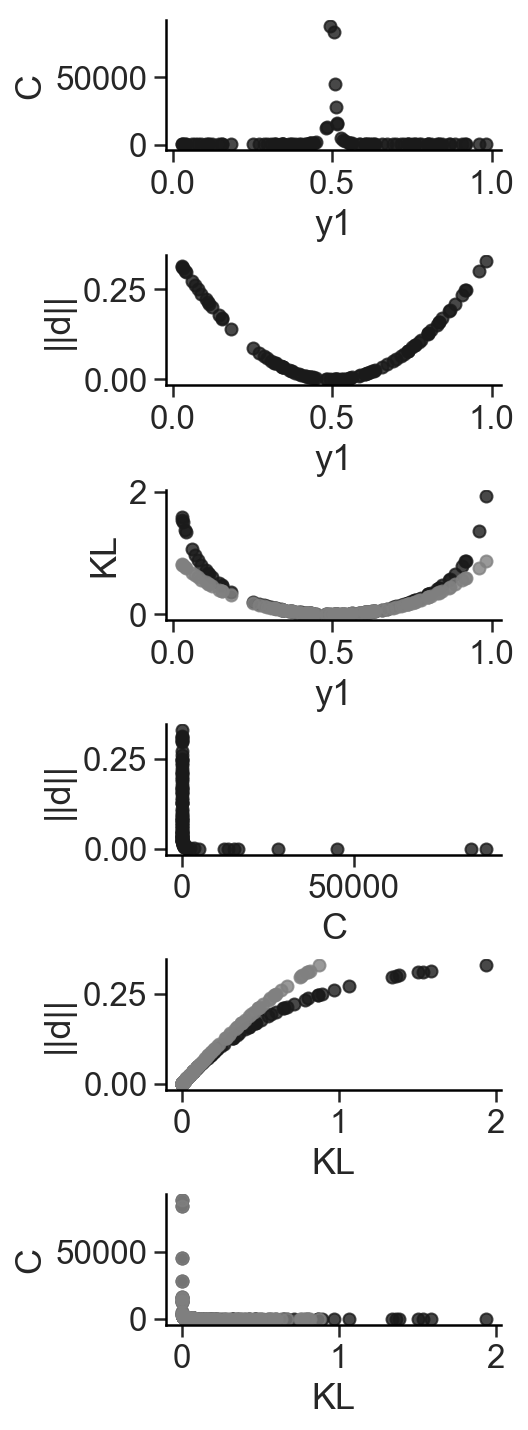

In [142]:
fig = plt.figure(figsize=(3, 12))
grid = plt.GridSpec(6, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.plot(y1s, cs, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("y1")
plt.ylabel("C")

plt.subplot(grid[1, 0])
plt.plot(y1s, ns, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("y1")
plt.ylabel("||d||")

plt.subplot(grid[2, 0])
plt.plot(y1s, kls, alpha=0.8, marker='o', linestyle='', color='k')
plt.plot(y1s, rkls, alpha=0.8, marker='o', linestyle='', color='grey')
plt.xlabel("y1")
plt.ylabel("KL")

plt.subplot(grid[3, 0])
plt.plot(cs, ns, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("C")
plt.ylabel("||d||")

plt.subplot(grid[4, 0])
plt.plot(kls, ns, alpha=0.8, marker='o', linestyle='', color='k')
plt.plot(rkls, ns, alpha=0.8, marker='o', linestyle='', color='grey')
plt.xlabel("KL")
plt.ylabel("||d||")

plt.subplot(grid[5, 0])
plt.plot(kls, cs, alpha=0.8, marker='o', linestyle='', color='k')
plt.plot(rkls, cs, alpha=0.8, marker='o', linestyle='', color='grey')
plt.xlabel("KL")
plt.ylabel("C")

sns.despine()

# Conclusion

- norm makes more sense than compactness
- all these metric-alikes are monotonic,
- so how much to do the details of their curves matter?

# Do ||d|| and KL ever break down?

- Higher d?
- Different perturb schemes
- d expansion (chinese resturant process-alike)

SpearmanrResult(correlation=0.9990849630849631, pvalue=0.0)
SpearmanrResult(correlation=1.0, pvalue=0.0)


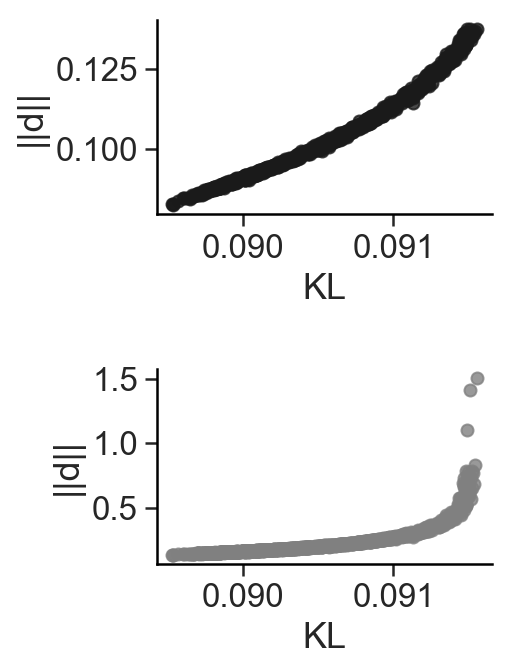

In [294]:
# Single pertub (randomly placed)
num_samples = 1000
num_dim = 100
ep = 0.1

# -
y1s, cs, ns, kls, rkls = [], [], [], [], []
for n in range(num_samples):
    x = np.random.rand(num_dim) 
    x /= np.sum(x)

    i = np.random.randint(0, num_dim)
    y = x.copy()
    y[i] += ep
    y /= np.sum(y)
    
    d = l1(y, x)
    
    ns.append(norm(d))
    kls.append(entropy(x, qk=y, base=2))
    rkls.append(entropy(y, qk=x, base=2))
    
ns = np.asarray(ns)
kls = np.asarray(kls)
rkls = np.asarray(rkls)

# -
fig = plt.figure(figsize=(3, 5))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])
plt.plot(ns, kls, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("KL")
plt.ylabel("||d||");

plt.subplot(grid[1, 0])
plt.plot(ns, rkls, alpha=0.8, marker='o', linestyle='', color='grey')
plt.xlabel("KL")
plt.ylabel("||d||");

sns.despine()

# -
print(spearmanr(ns, rkls))
print(spearmanr(kls, rkls))

SpearmanrResult(correlation=0.9756274836274837, pvalue=0.0)
SpearmanrResult(correlation=0.6822679662679664, pvalue=6.575767540751139e-138)


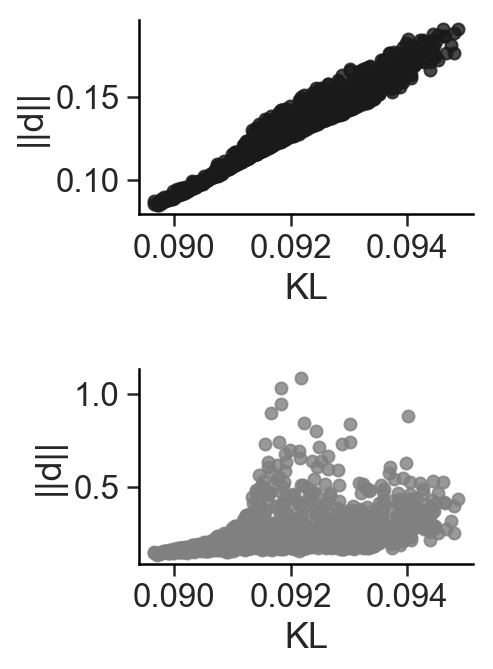

In [296]:
# Specific pertub (randomly placed)
num_samples = 1000
num_dim = 100
ep = 0.1

# -
y1s, cs, ns, kls, rkls = [], [], [], [], []
for n in range(num_samples):
    x = np.random.rand(num_dim) 
    x /= np.sum(x)

    i = np.random.randint(1, num_dim)
    j = np.random.randint(0, i)
    y = x.copy()
    y[i] += ep
    y[j] -= ep
    y[y<=0] = 1e-3
    y /= np.sum(y)
    
    d = l1(y, x)
    
    ns.append(norm(d))
    kls.append(entropy(x, qk=y, base=2))
    rkls.append(entropy(y, qk=x, base=2))
    
ns = np.asarray(ns)
kls = np.asarray(kls)
rkls = np.asarray(rkls)

# -
fig = plt.figure(figsize=(3, 5))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])
plt.plot(ns, kls, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("KL")
plt.ylabel("||d||");

plt.subplot(grid[1, 0])
plt.plot(ns, rkls, alpha=0.8, marker='o', linestyle='', color='grey')
plt.xlabel("KL")
plt.ylabel("||d||");

sns.despine()

# -
print(spearmanr(ns, kls))
print(spearmanr(kls, rkls))

SpearmanrResult(correlation=0.8813560733560735, pvalue=0.0)
SpearmanrResult(correlation=0.9174298854298856, pvalue=0.0)


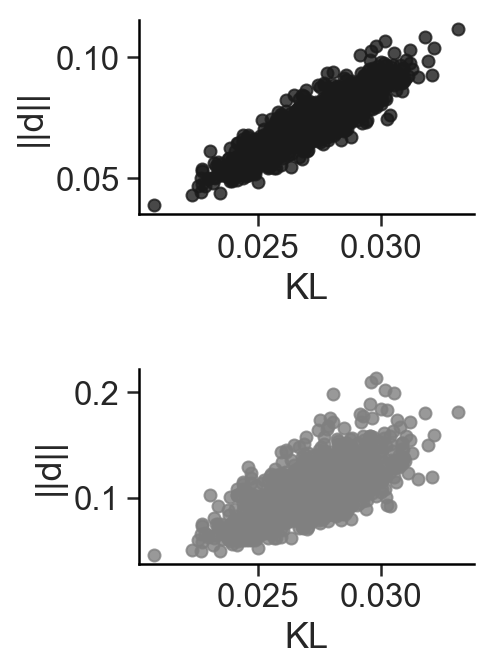

In [293]:
# Uniform perturb
num_samples = 1000
num_dim = 100
ep = .01

# -
y1s, cs, ns, kls, rkls = [], [], [], [], []
for n in range(num_samples):
    x = np.random.rand(num_dim) 
    x /= np.sum(x)

    y = x.copy()
    y += np.random.uniform(0, ep, size=num_dim)
    y[y<=0] = 1e-12
    y /= np.sum(y)
    
    d = l1(y, x)
    
    ns.append(norm(d))
    kls.append(entropy(x, qk=y, base=2))
    rkls.append(entropy(y, qk=x, base=2))
    
ns = np.asarray(ns)
kls = np.asarray(kls)
rkls = np.asarray(rkls)

# -
fig = plt.figure(figsize=(3, 5))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])
plt.plot(ns, kls, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("KL")
plt.ylabel("||d||");

plt.subplot(grid[1, 0])
plt.plot(ns, rkls, alpha=0.8, marker='o', linestyle='', color='grey')
plt.xlabel("KL")
plt.ylabel("||d||");

sns.despine()

# -
print(spearmanr(ns, kls))
print(spearmanr(kls, rkls))

SpearmanrResult(correlation=0.6027738167197382, pvalue=0.0)
SpearmanrResult(correlation=0.5862242477822425, pvalue=0.0)


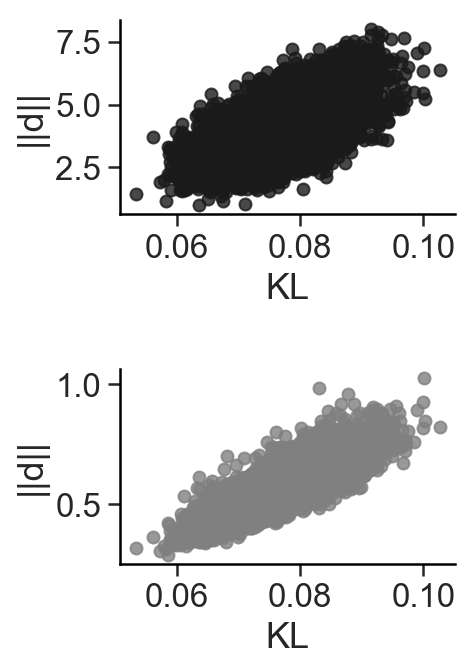

In [292]:
# Normal perturb
num_samples = 10000
num_dim = 100
ep = .01

# -
y1s, cs, ns, kls, rkls = [], [], [], [], []
for n in range(num_samples):
    x = np.random.rand(num_dim) 
    x /= np.sum(x)

    y = x.copy()
    y += np.random.normal(0, ep, size=num_dim)
    y[y<=0] = 1e-12
    y /= np.sum(y)
    
    d = l1(y, x)
    
    ns.append(norm(d))
    kls.append(entropy(x, qk=y, base=2))
    rkls.append(entropy(y, qk=x, base=2))
    
ns = np.asarray(ns)
kls = np.asarray(kls)
rkls = np.asarray(rkls)

# -
fig = plt.figure(figsize=(3, 5))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])
plt.plot(ns, kls, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("KL")
plt.ylabel("||d||");

plt.subplot(grid[1, 0])
plt.plot(ns, rkls, alpha=0.8, marker='o', linestyle='', color='grey')
plt.xlabel("KL")
plt.ylabel("||d||");

sns.despine()

# -
print(spearmanr(ns, kls))
print(spearmanr(kls, rkls))

# Does ||d|| ever mis-behave in non-probablistic settings?

- Cases?